In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/raw/GlobalDietaryDatabase_V2.csv')

In [4]:
#Display dimensions of the dataframe(df)
data.shape

(185, 74)

In [6]:
#Display summary information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 74 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           185 non-null    int64  
 1   Entity                                               185 non-null    object 
 2   superregion2                                         185 non-null    object 
 3   iso3                                                 185 non-null    object 
 4   Fruits                                               185 non-null    float64
 5   Non-starchy vegetables                               185 non-null    float64
 6   Potatoes                                             185 non-null    float64
 7   Other starchy vegetables                             185 non-null    float64
 8   Beans and legumes                                    185 non-null    f

In [7]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
0,1,Afghanistan,SAARC,AFG,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,...,1,48,27,76,222,134,3,1,0,1
1,2,Angola,SSA,AGO,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,...,28,106,14,112,267,135,0,85,4,2
2,3,Albania,FSU,ALB,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,...,16,263,211,393,297,308,2,83,1,19
3,4,United Arab Emirates,MENA,ARE,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,...,48,353,106,176,718,223,34,36,6,9
4,5,Argentina,LAC,ARG,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,...,11,601,52,91,552,400,3,125,0,0


In [8]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0                                       0
Entity                                           0
superregion2                                     0
iso3                                             0
Fruits                                           0
                                                ..
Supply_ Sweets and sugars                        0
Supply_ Spices and condiments                    0
Supply_ Beverages                                0
Supply_ Foods for particular nutritional uses    0
Supply_ Miscellaneous                            0
Length: 74, dtype: int64


# **DATA CLEANING**

In [9]:
#Make a copy of the dataframe(df) to be cleaned
df_cleaned = data.copy()

In [10]:
#Remove unnecessary columns
columns_to_drop = ['Unnamed: 0'] + [col for col in data.columns if col.startswith('Supply_')]
df_cleaned = data.drop(columns=columns_to_drop)

#Handle missing values. For simplicity, we'll fill missing values with the mean of their respective columns.
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

#Check if there's any remaining missing value that wasn't handled (e.g., non-numeric columns).
missing_values_check = df_cleaned.isnull().sum()

#Check data types for a brief overview.
data_types = df_cleaned.dtypes

(df_cleaned.head(), missing_values_check, data_types)

(                 Entity superregion2 iso3      Fruits  Non-starchy vegetables   
 0           Afghanistan        SAARC  AFG   65.697036               98.080124  \
 1                Angola          SSA  AGO  119.746980              308.837004   
 2               Albania          FSU  ALB  138.874360              129.083757   
 3  United Arab Emirates         MENA  ARE  107.577820              123.284747   
 4             Argentina          LAC  ARG   93.995787              123.803276   
 
      Potatoes  Other starchy vegetables  Beans and legumes  Nuts and seeds   
 0   21.195808                 44.892140         103.830266       31.205695  \
 1  346.377109                 52.662482          37.799557       11.612246   
 2  185.783632                 73.031694          40.181361       12.272771   
 3  182.972287                 57.068126          40.563807       31.729379   
 4   51.336122                  7.010755           3.575009        1.564769   
 
    Refined grains  ...  Vitam

In [11]:
df_cleaned.columns

Index(['Entity', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Continen

In [12]:
# Define dictionary of old and new column names
column_name_mapping = {
    'Entity': 'Country',
    'Population (2021)': 'Population', 'Gross National Income Per Capita (2021)': 'Gross Income Per Capita'
}

# Rename the columns
df_cleaned = df_cleaned.rename(columns=column_name_mapping)

# **DATA EXPLORATION**

In [14]:
#Display column names
df_cleaned.columns

Index(['Country', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Contine

In [15]:
# Group columns into 3 meaningful categories
meaningful_categories = {
    '1. Health and Demographic Information': ['Country', 'superregion2', 'iso3','Year', 'Diabetes prevalence (% of population ages 20 to 79)', 
                                           'Continent', 'ObesityRate', 'Population', 
                                           'Gross Income Per Capita', 'Unit'],
    '2. Food Groups': ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 
                    'Beans and legumes', 'Nuts and seeds', 'Refined grains', 'Whole grains', 
                    'Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 
                    'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages', 
                    'Fruit juices', 'Coffee', 'Tea', 'Total Milk'],
    '3. Nutritional Content': ['Total carbohydrates', 'Total protein', 'Saturated fat', 
                            'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 
                            'Plant omega-3 fat', 'Dietary fiber', 'Added sugars', 'Calcium', 
                            'Dietary sodium', 'Iodine', 'Iron', 'Magnesium', 'Potassium', 'Selenium', 
                            'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 
                            'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 
                            'Vitamin D', 'Vitamin E', 'Zinc']
}

# Print the defined categories
for category, columns in meaningful_categories.items():
    print(category, ':', columns)

1. Health and Demographic Information : ['Country', 'superregion2', 'iso3', 'Year', 'Diabetes prevalence (% of population ages 20 to 79)', 'Continent', 'ObesityRate', 'Population', 'Gross Income Per Capita', 'Unit']
2. Food Groups : ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea', 'Total Milk']
3. Nutritional Content : ['Total carbohydrates', 'Total protein', 'Saturated fat', 'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12'

# **1. Health and Demographic**

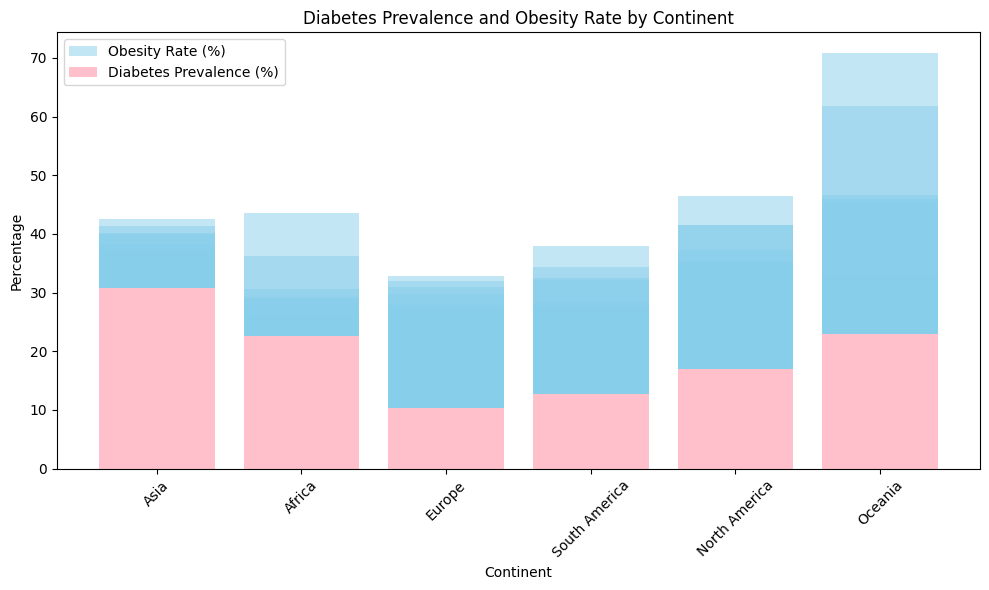

In [16]:
# View of Obesity rate and diabetes prevalence by continent
plt.figure(figsize=(10, 6))

# Plotting Obesity Rate
plt.bar(df_cleaned['Continent'], df_cleaned['ObesityRate'], color='skyblue', label='Obesity Rate (%)', alpha=0.5)

# Plotting Diabetes Prevalence
plt.bar(df_cleaned['Continent'], df_cleaned['Diabetes prevalence (% of population ages 20 to 79)'], color='pink', label='Diabetes Prevalence (%)')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Diabetes Prevalence and Obesity Rate by Continent')

# Adding legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

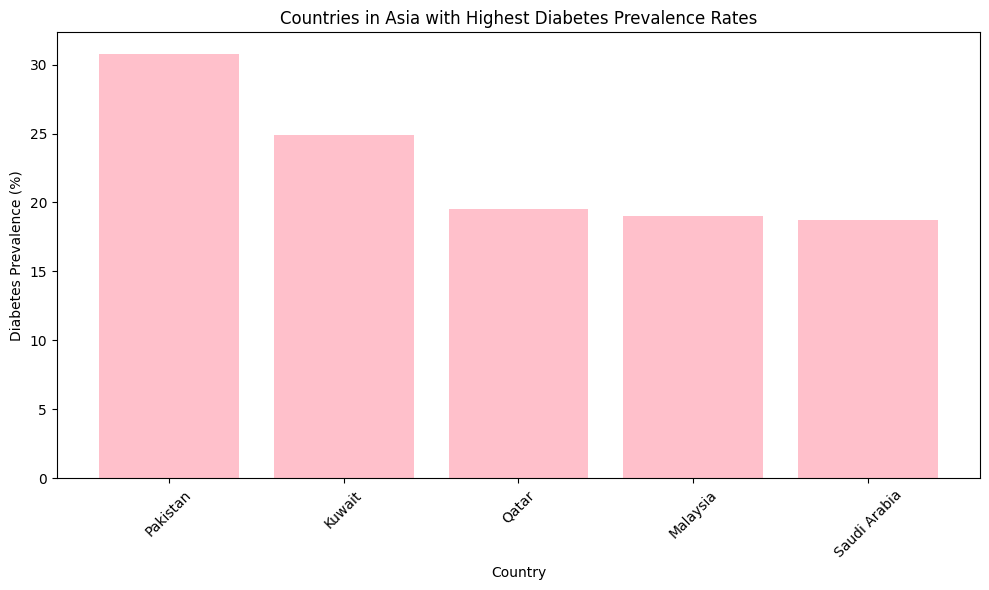

In [20]:
#Identify countries in Asia continent with high diabetes and high obesity rates

# Filter countries in the Asia continent
asia_df = df_cleaned[df_cleaned['Continent'] == 'Asia']

# Sort by diabetes prevalence rates in descending order
asia_df_sorted = asia_df.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)

# Select top countries with the highest diabetes prevalence rates
top_countries = asia_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Diabetes prevalence (% of population ages 20 to 79)'], color='pink')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Diabetes Prevalence (%)')
plt.title('Countries in Asia with Highest Diabetes Prevalence Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

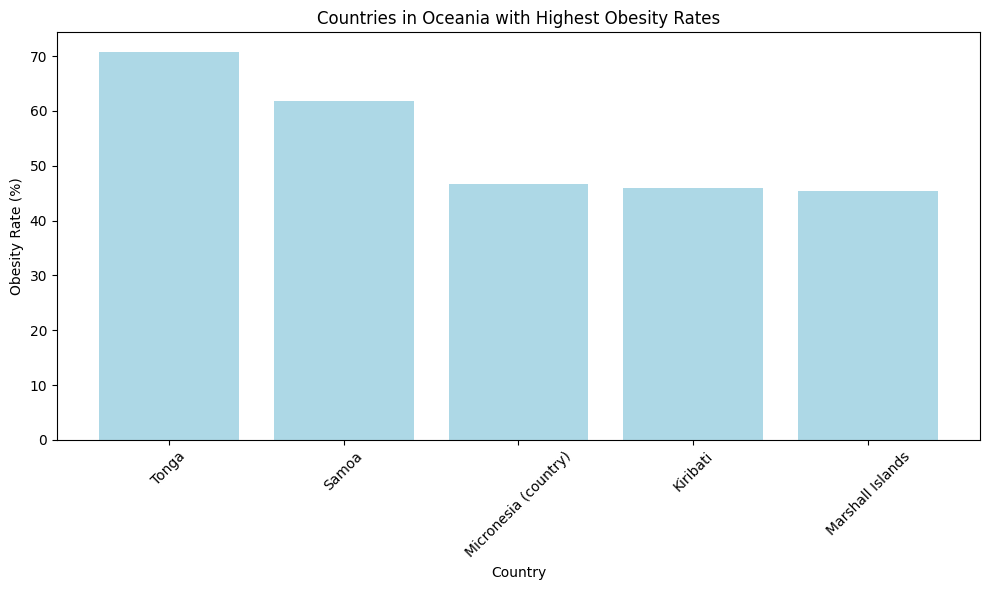

In [28]:
# Filter countries in the Oceania continent
oceania_df = df_cleaned[df_cleaned['Continent'] == 'Oceania']

# Sort by obesity rates in descending order
oceania_df_sorted = oceania_df.sort_values(by='ObesityRate', ascending=False)

# Select top countries with the highest obesity rates
top_countries = oceania_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['ObesityRate'], color='lightblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Obesity Rate (%)')
plt.title('Countries in Oceania with Highest Obesity Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

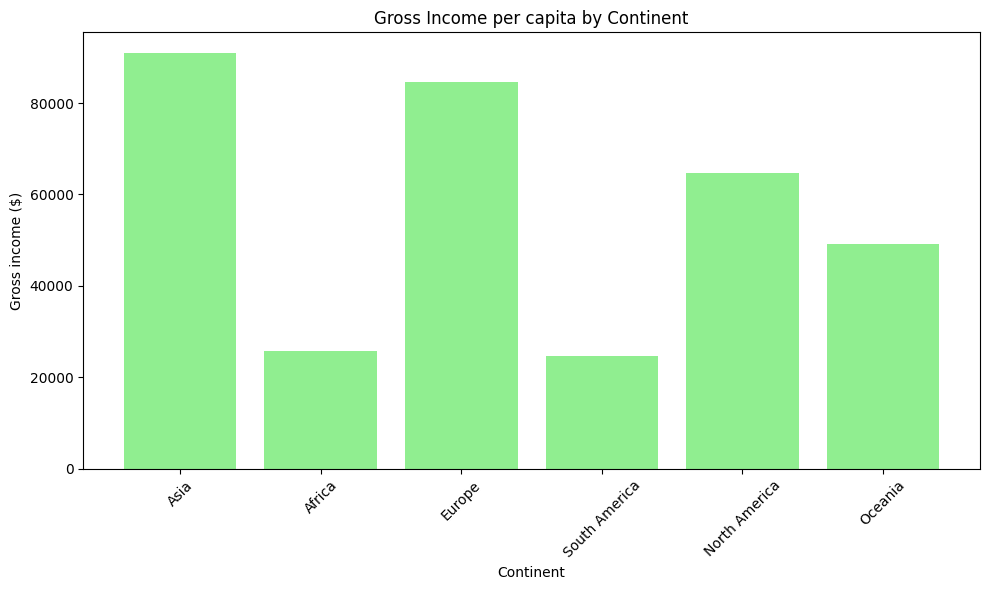

In [31]:
# View of gross income per capita by continent
plt.figure(figsize=(10, 6))
plt.bar(df_cleaned['Continent'], df_cleaned['Gross Income Per Capita'], color='LightGreen')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Gross income ($)')
plt.title('Gross Income per capita by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

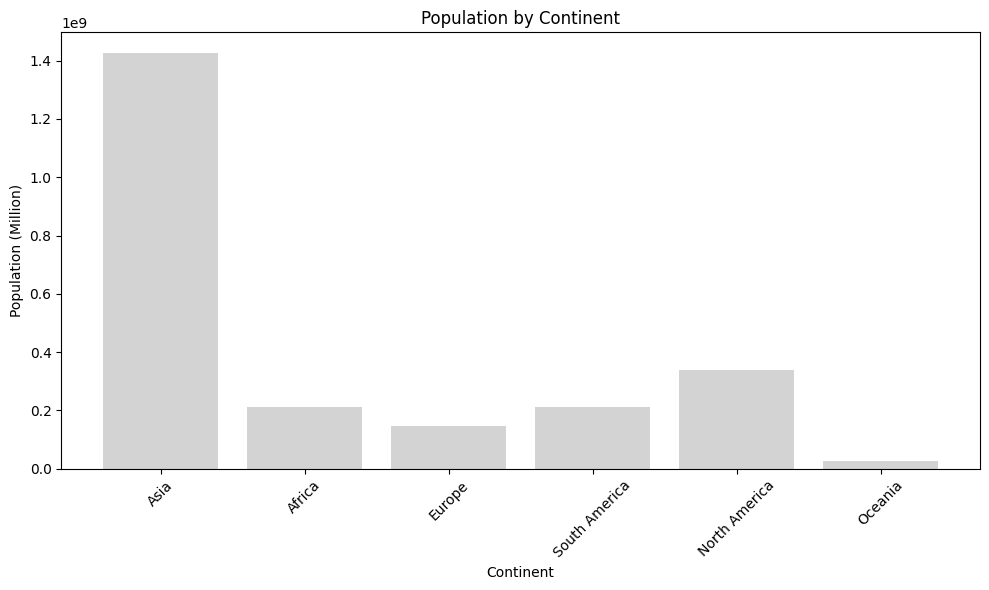

In [33]:
# View of population by continent
plt.figure(figsize=(10, 6))
plt.bar(df_cleaned['Continent'], df_cleaned['Population'], color='LightGrey')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Population (Million)')
plt.title('Population by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **2. Food Groups**

In [35]:
# Grouping foods into categories
Protein = ['Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)','Sugar-sweetened beverages','Coffee', 'Tea',]
Dairy = ['Total Milk']
Cereal = ['Refined grains', 'Whole grains']
Fruits_Vegetables = ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds', 'Fruit juices']

# Calculate total intake for each food group
df_cleaned['Protein'] = df_cleaned[Protein].sum(axis=1)
df_cleaned['Dairy'] = df_cleaned[Dairy].sum(axis=1)
df_cleaned['Cereals'] = df_cleaned[Cereal].sum(axis=1)
df_cleaned['Fruit & Vegetables'] = df_cleaned[Fruits_Vegetables].sum(axis=1)

# Drop individual food columns
df_cleaned.drop(columns=Protein + Cereal + Fruits_Vegetables, inplace=True)

# Display the modified DataFrame
print(df_cleaned)

                  Country superregion2 iso3  Total carbohydrates   
0             Afghanistan        SAARC  AFG            67.476128  \
1                  Angola          SSA  AGO            60.115130   
2                 Albania          FSU  ALB            50.320140   
3    United Arab Emirates         MENA  ARE            58.226582   
4               Argentina          LAC  ARG            49.462134   
..                    ...          ...  ...                  ...   
180                 Samoa         Asia  WSM            58.415538   
181                 Yemen         MENA  YEM            58.199504   
182          South Africa          SSA  ZAF            56.716201   
183                Zambia          SSA  ZMB            60.065839   
184              Zimbabwe          SSA  ZWE            60.905160   

     Total protein  Saturated fat  Monounsaturated fatty acids   
0        59.150274       7.489211                     5.013865  \
1        37.814544      10.663588                  

# **1.Correlation**
**1.Relationship between food and lifestyle diseases**

In [ ]:
Show relationship between food and lifestyle disease for Tonga and Pakistan having the highest rates

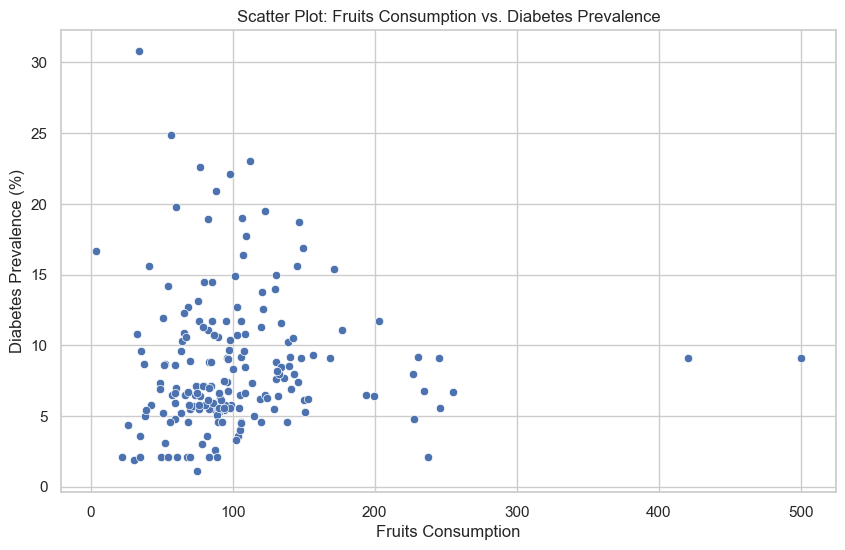

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned contains relevant data including dietary factors and disease prevalence

# Scatter plot for a specific dietary factor (e.g., 'Fruits') vs. Diabetes prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Fruits', y='Diabetes prevalence (% of population ages 20 to 79)')
plt.title('Scatter Plot: Fruits Consumption vs. Diabetes Prevalence')
plt.xlabel('Fruits Consumption')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

In [52]:
relevant_columns = [
    'Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]

df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


correlation_with_diseases = correlation_matrix[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].sort_values(by='ObesityRate', ascending=False)
correlation_with_diseases

KeyError: "['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea'] not in index"

In [ ]:
# Pairplot
sns.pairplot(df)
plt.show()

# 2. **Geographical variation in lifestyle diseases**


*   **Continents with the Highest Levels of Diabetes Prevalence and obesity**




C:\Users\joann\AppData\Local\Temp\ipykernel_2544\4261141773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
C:\Users\joann\AppData\Local\Temp\ipykernel_2544\4261141773.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')


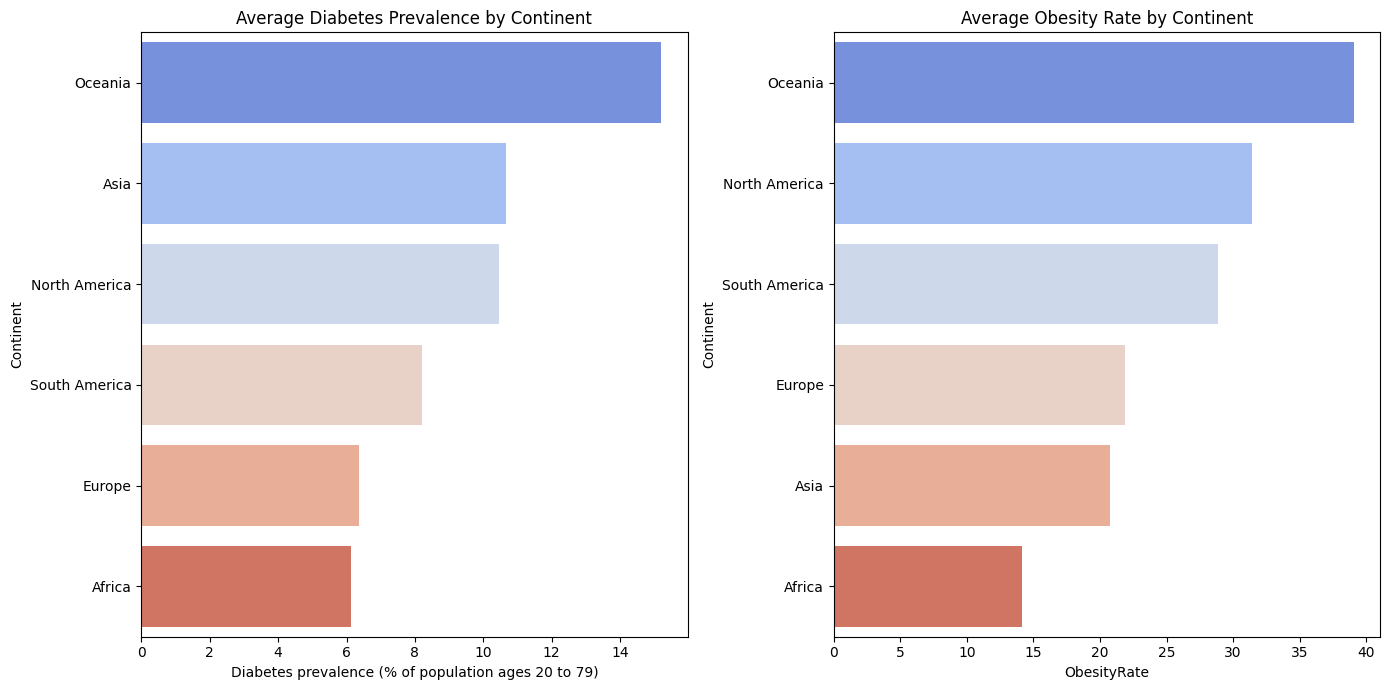

(       Continent  Diabetes prevalence (% of population ages 20 to 79)   
 4        Oceania                                          15.209091    \
 1           Asia                                          10.676087     
 3  North America                                          10.450000     
 5  South America                                           8.208333     
 2         Europe                                           6.360000     
 0         Africa                                           6.141509     
 
    ObesityRate  
 4    39.084545  
 1    20.790652  
 3    31.413182  
 5    28.871667  
 2    21.877000  
 0    14.170943  ,
        Continent  Diabetes prevalence (% of population ages 20 to 79)   
 4        Oceania                                          15.209091    \
 3  North America                                          10.450000     
 5  South America                                           8.208333     
 2         Europe                                        

In [11]:
#Aggregating data by Continent to compare diabetes and obesity rates across continents
continent_aggregate = df_cleaned.groupby('Continent').agg({
    'Diabetes prevalence (% of population ages 20 to 79)': 'mean',
    'ObesityRate': 'mean'
}).reset_index()

#Sorting the data for better visualization
continent_aggregate_sorted_diabetes = continent_aggregate.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
continent_aggregate_sorted_obesity = continent_aggregate.sort_values(by='ObesityRate', ascending=False)

#Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
plt.title('Average Diabetes Prevalence by Continent')

plt.subplot(1, 2, 2)
sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')
plt.title('Average Obesity Rate by Continent')

plt.tight_layout()
plt.show()

# Displaying the sorted data frames for detailed examination
continent_aggregate_sorted_diabetes, continent_aggregate_sorted_obesity

Oceania has the highest average diabetes prevalence (approximately 15.2%) and the highest obesity rates (approximately 39.1%) among the continents analyzed. This indicates a significant health concern in terms of lifestyle diseases in this region.



*   **Countries with the Highest Levels of Diabetes**



In [12]:
# Extracting countries with the highest diabetes and obesity rates for detailed analysis and Sorting the dataframe by diabetes prevalence and obesity rate
df_sorted_diabetes = df_cleaned.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
df_sorted_obesity = df_cleaned.sort_values(by='ObesityRate', ascending=False)

#top10_diabetes_countries, top10_obesity_countries
#Identify countries with the highest levels of diabetes prevalence and obesity rates
top_diabetes_countries = data.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)
top_obesity_countries = data.sort_values(by='ObesityRate', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)

(top_diabetes_countries, top_obesity_countries)



(               Entity Continent   
 129          Pakistan      Asia  \
 92             Kuwait      Asia   
 108  Marshall Islands   Oceania   
 117         Mauritius    Africa   
 90           Kiribati   Oceania   
 50              Egypt    Africa   
 146   Solomon Islands   Oceania   
 138             Qatar      Asia   
 119          Malaysia      Asia   
 143             Sudan    Africa   
 
      Diabetes prevalence (% of population ages 20 to 79)  ObesityRate  
 129                                               30.8          21.85  
 92                                                24.9          41.30  
 108                                               23.0          45.48  
 117                                               22.6          18.87  
 90                                                22.1          45.98  
 50                                                20.9          43.64  
 146                                               19.8          22.20  
 138              

Tonga and Samoa lead with obesity rates of 70.8% and 61.77%, respectively, highlighting a major public health concern.
Micronesia, Kiribati, and the Marshall Islands also feature prominently, with obesity rates ranging from approximately 45% to 46%.
Outside of Oceania, Egypt, Qatar, and the United States show high obesity rates, with the US at 41.48%.


Focusing deeper into the relationship between dietary patterns, focusing on the consumption of refined grains and sugar-sweetened beverages, and their impact on obesity and diabetes rates.


**Step 1:Visualize the Relationship between Refined Grain Consumption and Diabetes Prevalence**

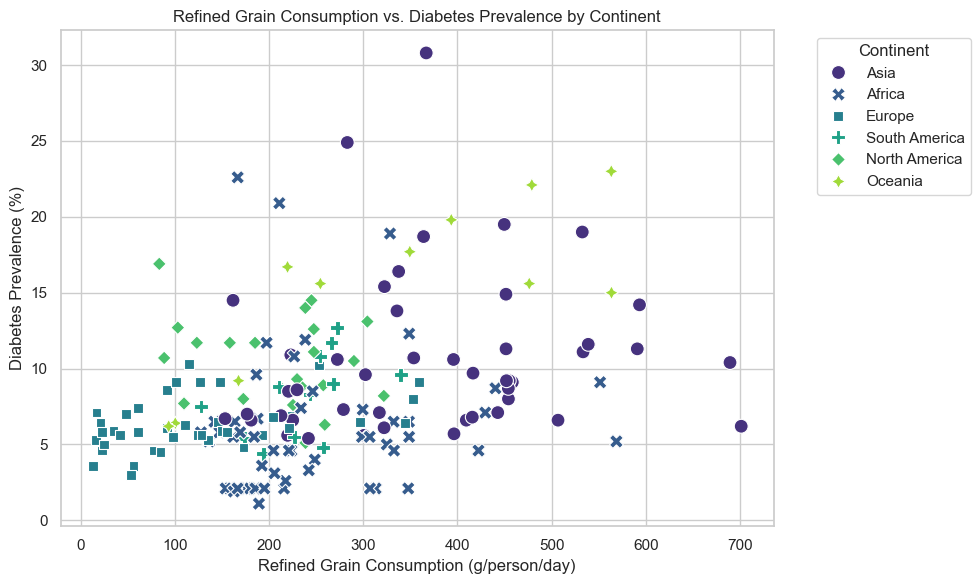

In [13]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for Refined Grain Consumption vs. Diabetes Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Refined grains", y="Diabetes prevalence (% of population ages 20 to 79)", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Refined Grain Consumption vs. Diabetes Prevalence by Continent')
plt.xlabel('Refined Grain Consumption (g/person/day)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 **Step 2: Visualize the Relationship between Sugar-Sweetened Beverage Consumption and Obesity Rates**

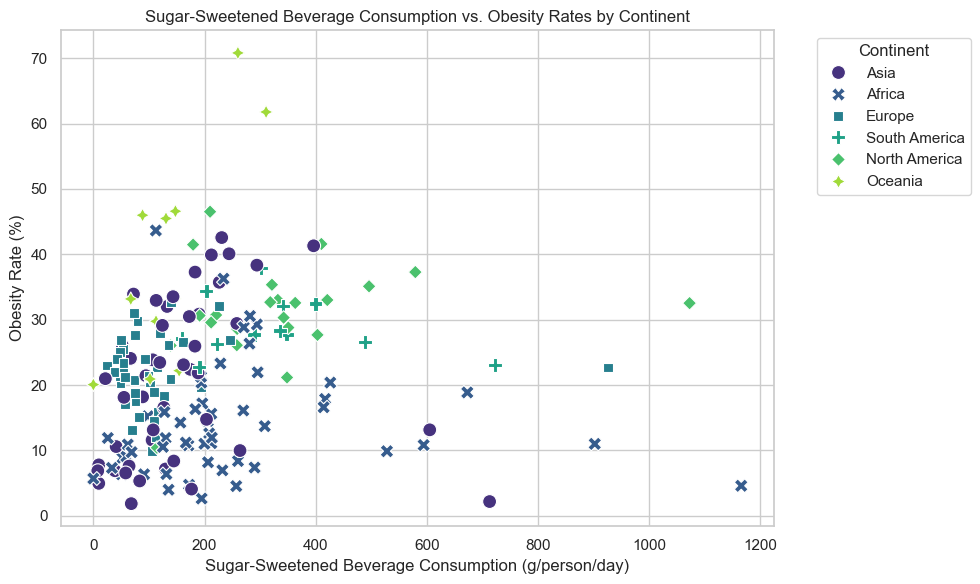

In [14]:
# Scatter plot for Sugar-Sweetened Beverage Consumption vs. Obesity Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Sugar-sweetened beverages", y="ObesityRate", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Sugar-Sweetened Beverage Consumption vs. Obesity Rates by Continent')
plt.xlabel('Sugar-Sweetened Beverage Consumption (g/person/day)')
plt.ylabel('Obesity Rate (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Correlation Exploration**

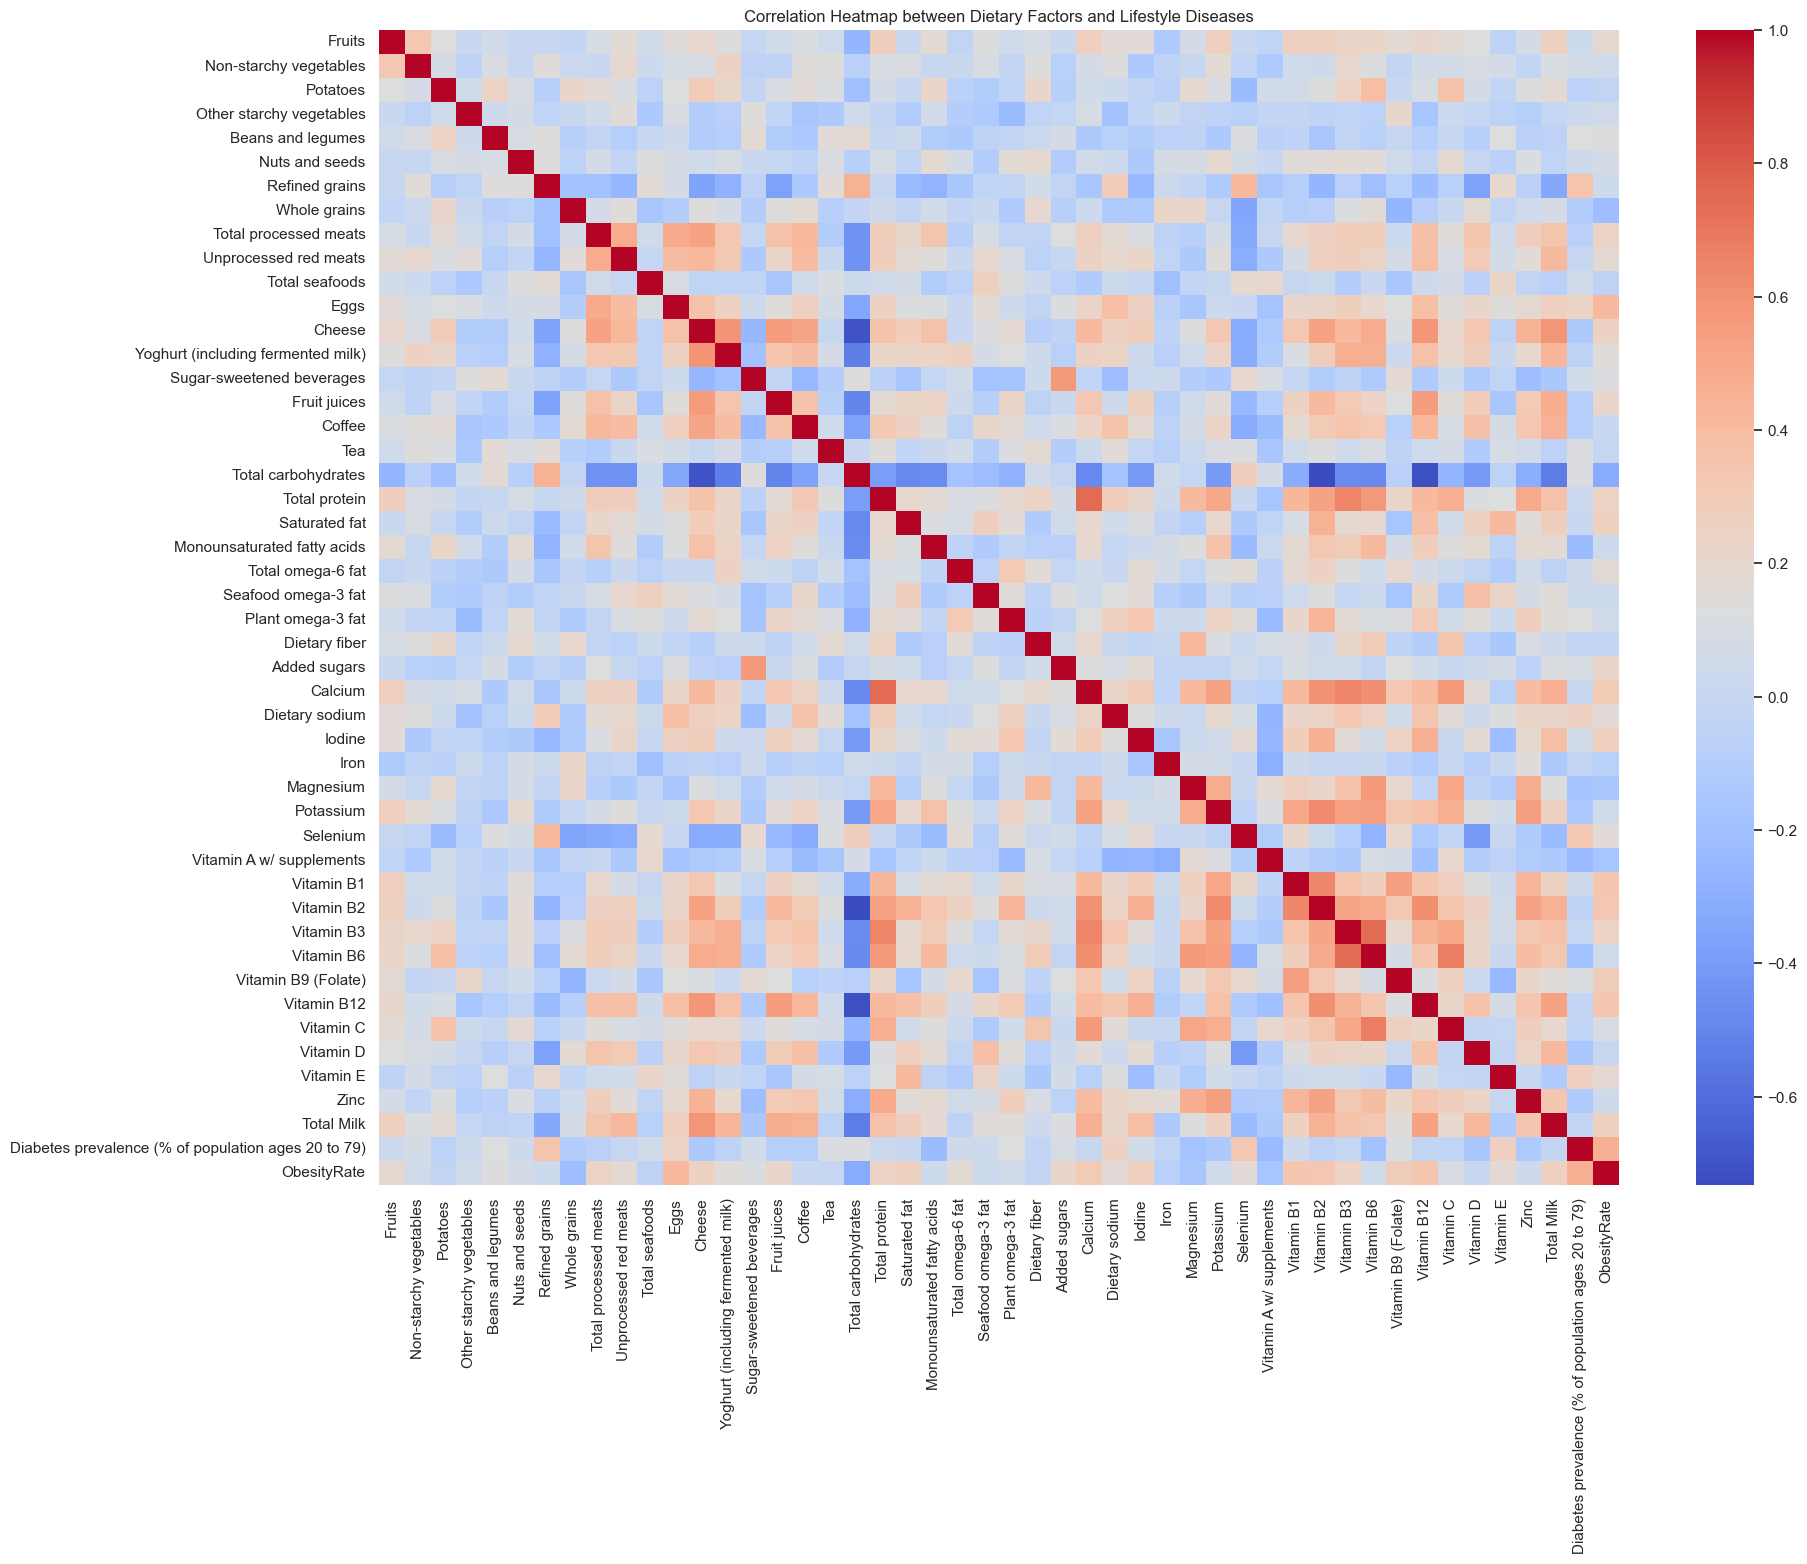

,Diabetes prevalence (% of population ages 20 to 79),ObesityRate
ObesityRate,0.458911,1.000000
Diabetes prevalence (% of population ages 20 to 79),1.000000,0.458911
Eggs,0.239157,0.409327
Vitamin B1,0.043930,0.338809
Vitamin B12,-0.021957,0.337575
Vitamin B2,-0.054173,0.336133
Calcium,0.000519,0.303470
Vitamin B9 (Folate),0.108050,0.287397
Iodine,0.063734,0.274043
Saturated fat,0.005966,0.264571


In [15]:
# Selecting relevant columns for correlation analysis
relevant_columns = [
    'Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]

# Focusing on relevant columns for correlation analysis
df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# We'll specifically look at correlations with Diabetes and Obesity to answer question 1.
correlation_with_diseases = correlation_matrix[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].sort_values(by='ObesityRate', ascending=False)
correlation_with_diseases


Eggs, Vitamin B1, and Vitamin B12 show a positive correlation with both diabetes prevalence and obesity rate, suggesting a nuanced relationship between these nutrients and lifestyle diseases

Whole grains and Total carbohydrates show a negative correlation with obesity rates, indicating that higher consumption of these foods might be associated with lower obesity levels. This might reflect the benefits of complex carbohydrates and dietary fiber.

# **INCOME AND LIFESTYLE DISEASES**

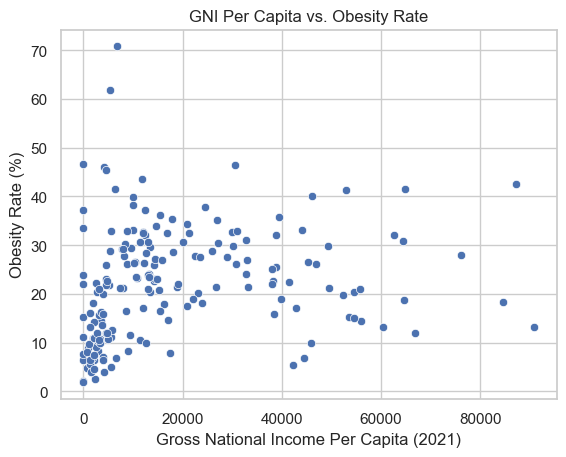

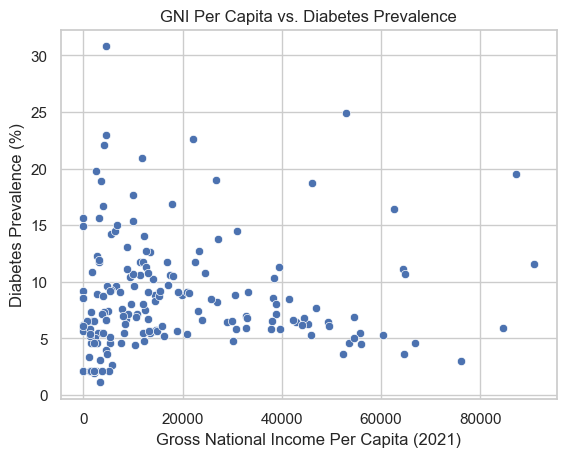

In [16]:
# Scatter plot for GNI vs. Obesity Rate
sns.scatterplot(x='Gross National Income Per Capita (2021)', y='ObesityRate', data=df_cleaned)
plt.title('GNI Per Capita vs. Obesity Rate')
plt.xlabel('Gross National Income Per Capita (2021)')
plt.ylabel('Obesity Rate (%)')
plt.show()

# Scatter plot for GNI vs. Diabetes Prevalence
sns.scatterplot(x='Gross National Income Per Capita (2021)', y='Diabetes prevalence (% of population ages 20 to 79)', data=df_cleaned)
plt.title('GNI Per Capita vs. Diabetes Prevalence')
plt.xlabel('Gross National Income Per Capita (2021)')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()


Data Distribution: There is a wide distribution of GNI per capita, with most data points congregating toward the lower end of the income scale. This suggests that most countries in this dataset have a lower GNI per capita.

Diabetes Prevalence: Diabetes prevalence varies across countries, with several countries having rates above 20%, which is relatively high.

Correlation:There does not appear to be a clear linear relationship between GNI per capita and diabetes prevalence. While there are countries with low GNI per capita and various diabetes prevalence rates, there's no distinct upward or downward trend that would indicate a strong correlation.

High-Income Countries: A few high-income countries appear to have either a lower or moderate prevalence of diabetes, but there's not enough visible trend to draw a definitive conclusion about the impact of high income on diabetes prevalence.


Lower-Income Countries: Amongst lower-income countries, diabetes prevalence rates are spread out, suggesting that factors other than income may play a significant role in diabetes prevalence.

In [17]:
# Calculate and print Pearson correlation coefficients
obesity_correlation = df_cleaned['Gross National Income Per Capita (2021)'].corr(df_cleaned['ObesityRate'])
diabetes_correlation = df_cleaned['Gross National Income Per Capita (2021)'].corr(df_cleaned['Diabetes prevalence (% of population ages 20 to 79)'])

print(f"Correlation between GNI Per Capita and Obesity Rate: {obesity_correlation}")
print(f"Correlation between GNI Per Capita and Diabetes Prevalence: {diabetes_correlation}")


Correlation between GNI Per Capita and Obesity Rate: 0.20244271287994728
Correlation between GNI Per Capita and Diabetes Prevalence: 0.045122384382607954


# **MODELLING**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [32]:
feature_columns = ['Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'ObesityRate']
target_column = 'Diabetes prevalence (% of population ages 20 to 79)'

In [33]:
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing target values
data[target_column] = imputer.fit_transform(data[[target_column]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data[target_column], test_size=0.2, random_state=42)

In [35]:
hgb_regressor = HistGradientBoostingRegressor()
hgb_regressor.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [38]:
# Predict disease prevalence on the testing set
y_pred = hgb_regressor.predict(X_test)

In [39]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.442006198431727


In [42]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 15.0 MB/s eta 0:00:00
     --------------------------------------- 22.9/22.9 MB 10.1 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt